In [1]:
import tensorflow as tf
print(tf.__version__)
(X_train, y_train), (X_test, y_test) = \
    tf.keras.datasets.mnist.load_data()

1.15.0
11493376/11490434 [==============================] - 1s 0us/step


In [3]:
# 입력층, 은닉층 설정 및 모델 선언
model = tf.keras.Sequential( layers=[
    tf.keras.layers.Flatten(input_shape=(28,28)), # 입력받은 2차원 데이터를 1차원화
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")    
    ])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [4]:
# 최적화 모델, 비용함수, 평가 척도 선언
model.compile (optimizer="adam",
               loss="sparse_categorical_crossentropy",
               metrics=["accuracy"])

In [5]:
# 모델 학습
history = model.fit(X_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 21us/sample - loss: 2.7699 - acc: 0.7536
Epoch 2/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.5940 - acc: 0.8492
Epoch 3/5
60000/60000 [==============================] - 1s 21us/sample - loss: 0.4638 - acc: 0.8831
Epoch 4/5
60000/60000 [==============================] - 1s 21us/sample - loss: 0.4144 - acc: 0.8956
Epoch 5/5
60000/60000 [==============================] - 1s 21us/sample - loss: 0.3851 - acc: 0.9024


In [6]:
# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print("\n테스트 정확도: ", test_acc)

10000/10000 - 0s - loss: 0.3028 - acc: 0.9349

테스트 정확도:  0.9349


예측값: 7, 실제값: 7


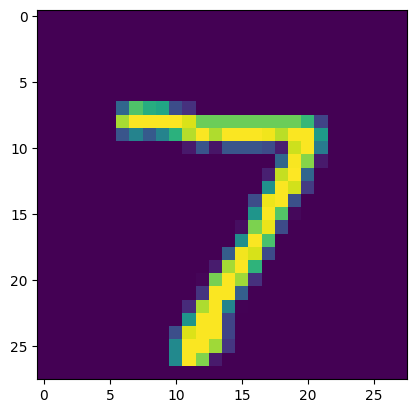

In [8]:
# 개별 예측 확인
import matplotlib.pyplot as plt
import numpy as np
predictions = model.predict(X_test)
pred = np.argmax(predictions[0])

print ("예측값: {}, 실제값: {}".format(pred, y_test[0]))

plt.imshow(X_test[0])
plt.show()

In [9]:
# 학습 내용 확인 (손실 함수의 값과 accuracy 확인)
history.history

{'loss': [2.7699166502157846,
  0.593973149283727,
  0.463764419661959,
  0.4143990477114916,
  0.38507600700656575],
 'acc': [0.7536333, 0.84915, 0.88311666, 0.89555, 0.9024]}

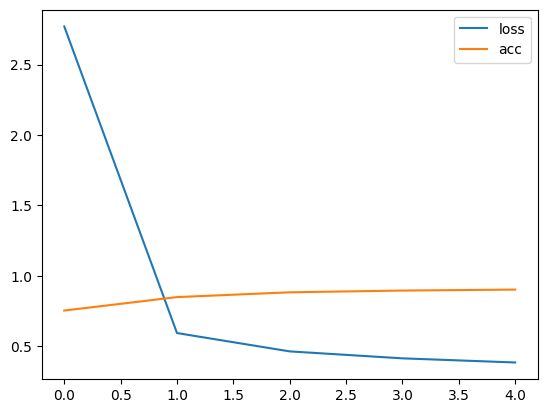

In [14]:
plt.plot(history.history["loss"])
plt.plot(history.history["acc"])
plt.legend(["loss", "acc"])
plt.show()
